In [ ]:
# Importar bibliotecas (pandas etc)
import numpy as np
import pandas as pd

# Importar algoritmo

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score, make_scorer,  accuracy_score

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score

from tensorflow.keras.layers import Input, Dense, Dropout, Activation  #importando as camadas a serem utilizadas
from tensorflow.keras.models import Model  #importando o modelo a ser empregado
from keras.models import Sequential, Model  #utilizada para criar o modelo sequencial da MLP
from keras.layers import Dense, Dropout, Input #utilizada para criar as camadas da rede
import seaborn as sns #plotar gráficos

from keras import backend as K

import missingno as msno

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/RNE renovacao

/content/drive/MyDrive/RNE renovacao


In [ ]:
%ls

 agendamento.pdf
'CamScanner 11-18-2022 16.39.pdf'
 dados_sem_urbana.csv
 DeclaracaoGenerica_1672849928911.pdf
 DeclaracaoHistorico_1672849909518.pdf
'df_final (1).csv'
 passaporte3.jpg
'protocoloPDF xxxxxx.pdf'
 SISMIGRA_1.73.0_-_28_11_2022_15_13_assinado.pdf


In [ ]:
df = pd.read_csv('dados_sem_urbana.csv')
print("SHAPE: ",df.shape)
df.head()

SHAPE:  (175247, 31)


,mean_b11,mean_b2,mean_b3,mean_b4,mean_b8,mean_mde,mean_mmri,mean_mndwi,mean_ndvi,mean_ndwi,...,sd_b2,sd_b3,sd_b4,sd_b8,sd_mde,sd_mmri,sd_mndwi,sd_ndvi,sd_ndwi,classe
0,2753.058624,1224.078590,1250.437128,1250.870858,2685.184367,31.450258,0.013745,-0.373531,0.364801,0.364244,...,40.287289,45.659471,114.155740,117.792633,3.089686,0.101680,0.035169,0.047170,0.020073,NaN
1,2881.145060,1235.677785,1219.220894,1262.107930,2575.129956,23.797567,0.086262,-0.403594,0.342418,0.356729,...,53.719208,58.156672,127.975245,148.755286,6.057349,0.106449,0.031324,0.056107,0.030531,NaN
2,3632.960000,1533.090000,1553.930000,1755.070000,2849.840000,15.802201,0.256552,-0.400998,0.239051,0.295033,...,111.859921,117.654261,159.795698,102.221105,2.085619,0.063813,0.026420,0.037520,0.028126,NaN
3,1941.631229,1115.531561,1080.966777,905.840532,2838.488372,20.364498,-0.288587,-0.283721,0.514981,0.447284,...,24.679403,30.700659,57.454600,189.580418,3.030736,0.069984,0.026486,0.039590,0.026612,NaN
4,3911.183673,1537.781633,1548.573469,1765.465306,2836.348980,13.668875,0.301277,-0.431290,0.235424,0.294700,...,156.763019,168.954842,250.731143,195.606161,1.592134,0.124772,0.035664,0.061218,0.041083,NaN


In [ ]:
#df = df.drop(columns=['classe'])

In [ ]:
#df = df.rename({'X0': 'classe'}, axis='columns')

In [ ]:
df.head()

,mean_b11,mean_b2,mean_b3,mean_b4,mean_b8,mean_mde,mean_mmri,mean_mndwi,mean_ndvi,mean_ndwi,...,sd_b2,sd_b3,sd_b4,sd_b8,sd_mde,sd_mmri,sd_mndwi,sd_ndvi,sd_ndwi,classe
0,2753.058624,1224.078590,1250.437128,1250.870858,2685.184367,31.450258,0.013745,-0.373531,0.364801,0.364244,...,40.287289,45.659471,114.155740,117.792633,3.089686,0.101680,0.035169,0.047170,0.020073,NaN
1,2881.145060,1235.677785,1219.220894,1262.107930,2575.129956,23.797567,0.086262,-0.403594,0.342418,0.356729,...,53.719208,58.156672,127.975245,148.755286,6.057349,0.106449,0.031324,0.056107,0.030531,NaN
2,3632.960000,1533.090000,1553.930000,1755.070000,2849.840000,15.802201,0.256552,-0.400998,0.239051,0.295033,...,111.859921,117.654261,159.795698,102.221105,2.085619,0.063813,0.026420,0.037520,0.028126,NaN
3,1941.631229,1115.531561,1080.966777,905.840532,2838.488372,20.364498,-0.288587,-0.283721,0.514981,0.447284,...,24.679403,30.700659,57.454600,189.580418,3.030736,0.069984,0.026486,0.039590,0.026612,NaN
4,3911.183673,1537.781633,1548.573469,1765.465306,2836.348980,13.668875,0.301277,-0.431290,0.235424,0.294700,...,156.763019,168.954842,250.731143,195.606161,1.592134,0.124772,0.035664,0.061218,0.041083,NaN


In [ ]:
amostras = df [ pd.isna ( df [ 'classe' ])  ==  False ]

In [ ]:
amostras.head()

,mean_b11,mean_b2,mean_b3,mean_b4,mean_b8,mean_mde,mean_mmri,mean_mndwi,mean_ndvi,mean_ndwi,...,sd_b2,sd_b3,sd_b4,sd_b8,sd_mde,sd_mmri,sd_mndwi,sd_ndvi,sd_ndwi,classe
14347,2898.521994,1278.302053,1256.378299,1323.079179,2457.225806,35.839250,0.138172,-0.394607,0.300048,0.323055,...,32.712822,37.253440,76.886382,92.860277,1.056437,0.063900,0.021000,0.035115,0.022599,agrocampes
14352,2366.021036,1229.844660,1142.381877,1187.245955,1952.152104,33.727548,0.184788,-0.347173,0.241202,0.258796,...,28.705262,36.303688,63.806451,208.819597,1.032453,0.074507,0.028116,0.042608,0.043028,agrocampes
14353,2577.429777,1211.064516,1191.168734,1146.458809,2565.607444,27.574618,-0.018599,-0.365828,0.381984,0.364967,...,42.237792,48.860838,106.224574,159.585898,3.998982,0.105794,0.034885,0.053514,0.030685,agrocampes
14354,2962.717348,1280.287416,1258.538706,1338.024613,2464.033347,33.424913,0.156122,-0.402743,0.296284,0.323342,...,46.783233,55.346058,107.094573,129.790629,3.859018,0.086178,0.024473,0.046621,0.028409,agrocampes
15450,2430.535932,1228.788063,1216.903776,1110.304507,2669.594397,15.578345,-0.110164,-0.330356,0.414786,0.374143,...,77.108448,99.182004,169.788648,129.735935,7.133296,0.104522,0.037317,0.057726,0.032828,agrocampes


In [ ]:
amostras.describe()

,mean_b11,mean_b2,mean_b3,mean_b4,mean_b8,mean_mde,mean_mmri,mean_mndwi,mean_ndvi,mean_ndwi,...,sd_b11,sd_b2,sd_b3,sd_b4,sd_b8,sd_mde,sd_mmri,sd_mndwi,sd_ndvi,sd_ndwi
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,...,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000
mean,2183.016794,1356.621339,1343.317059,1313.435625,2254.705976,9.444768,-0.055139,-0.192853,0.281524,0.252430,...,235.708415,64.496863,82.558729,119.864190,167.611072,2.004285,0.144412,0.050103,0.042962,0.037004
std,997.693043,326.116905,405.514972,594.517394,489.613673,10.378292,0.554722,0.180449,0.194509,0.142666,...,182.925425,64.025218,78.584286,109.950021,93.703799,1.642371,0.113500,0.037251,0.024511,0.023376
min,461.872595,1009.821483,924.347047,637.316558,797.168796,0.000000,-0.945778,-0.507257,-0.174954,-0.255598,...,23.942181,8.900719,10.916614,12.949153,20.490769,0.000000,0.016515,0.009115,0.003806,0.005609
25%,1139.109372,1111.554774,1033.744635,799.527632,1867.730042,1.971988,-0.451384,-0.338609,0.097318,0.149936,...,84.833781,19.332174,28.483553,33.924052,113.353018,0.787941,0.069583,0.027303,0.024688,0.021790
50%,1995.446942,1228.582120,1186.552780,1148.432967,2265.471786,4.327313,0.023950,-0.236654,0.301634,0.267000,...,183.729257,40.706489,50.637869,84.316780,142.656249,1.658691,0.110668,0.038868,0.038080,0.032184
75%,2986.495189,1512.048933,1529.061425,1728.570376,2664.968193,16.431365,0.460227,-0.032230,0.424652,0.348311,...,335.866998,81.951415,103.490671,167.347657,181.334525,2.745948,0.173117,0.056087,0.054084,0.042857
max,4720.224299,2849.797665,3126.112840,3467.443396,3672.000000,45.393903,0.953237,0.472597,0.648655,0.519249,...,942.516065,337.063957,396.213764,518.659287,738.837030,10.674643,0.593854,0.227622,0.163812,0.183781


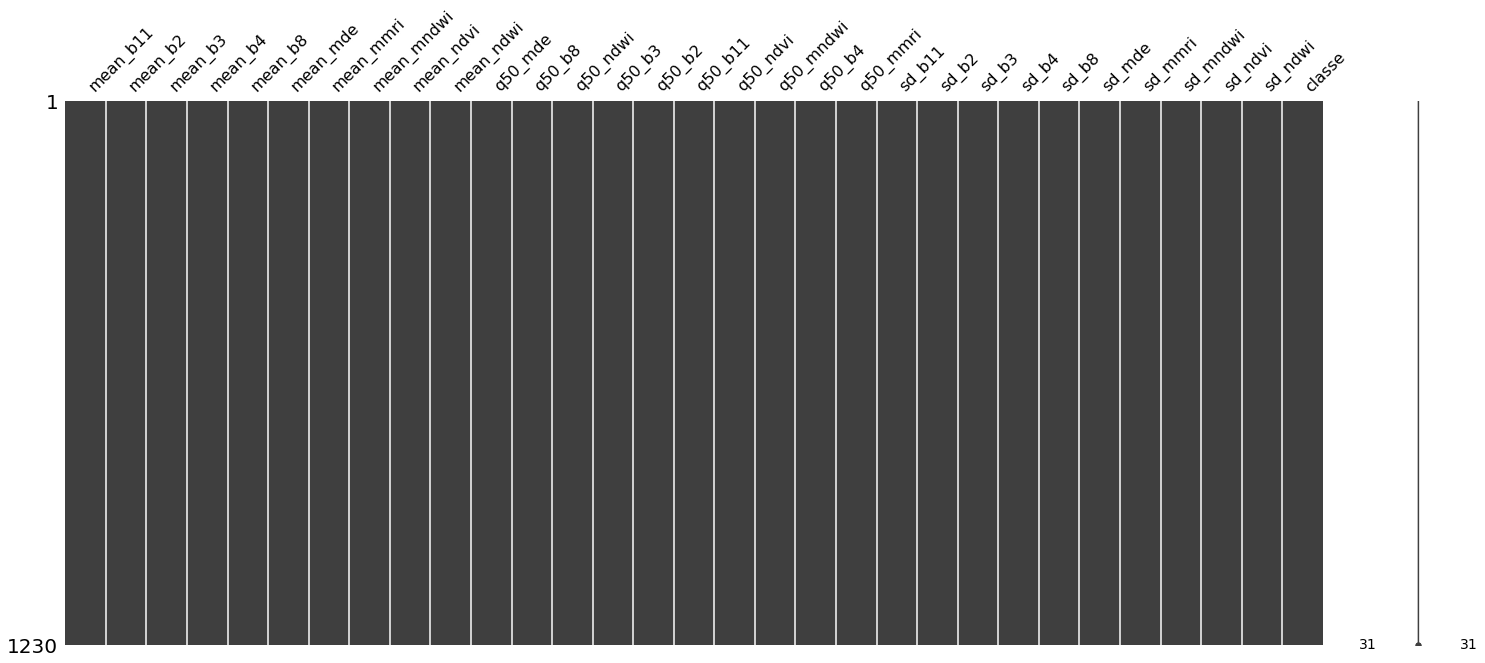

In [ ]:
msno.matrix(amostras)
plt.show()

In [ ]:
y = amostras['classe']
X = amostras.drop(columns=['classe'])

In [ ]:
X.head()

,mean_b11,mean_b2,mean_b3,mean_b4,mean_b8,mean_mde,mean_mmri,mean_mndwi,mean_ndvi,mean_ndwi,...,sd_b11,sd_b2,sd_b3,sd_b4,sd_b8,sd_mde,sd_mmri,sd_mndwi,sd_ndvi,sd_ndwi
14347,2898.521994,1278.302053,1256.378299,1323.079179,2457.225806,35.839250,0.138172,-0.394607,0.300048,0.323055,...,154.057546,32.712822,37.253440,76.886382,92.860277,1.056437,0.063900,0.021000,0.035115,0.022599
14352,2366.021036,1229.844660,1142.381877,1187.245955,1952.152104,33.727548,0.184788,-0.347173,0.241202,0.258796,...,201.612275,28.705262,36.303688,63.806451,208.819597,1.032453,0.074507,0.028116,0.042608,0.043028
14353,2577.429777,1211.064516,1191.168734,1146.458809,2565.607444,27.574618,-0.018599,-0.365828,0.381984,0.364967,...,239.320264,42.237792,48.860838,106.224574,159.585898,3.998982,0.105794,0.034885,0.053514,0.030685
14354,2962.717348,1280.287416,1258.538706,1338.024613,2464.033347,33.424913,0.156122,-0.402743,0.296284,0.323342,...,208.778027,46.783233,55.346058,107.094573,129.790629,3.859018,0.086178,0.024473,0.046621,0.028409
15450,2430.535932,1228.788063,1216.903776,1110.304507,2669.594397,15.578345,-0.110164,-0.330356,0.414786,0.374143,...,298.298276,77.108448,99.182004,169.788648,129.735935,7.133296,0.104522,0.037317,0.057726,0.032828


In [ ]:
y.head()

14347    agrocampes
14352    agrocampes
14353    agrocampes
14354    agrocampes
15450    agrocampes
Name: classe, dtype: object

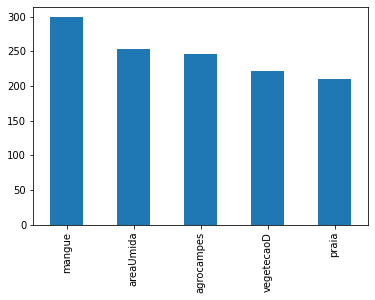

In [ ]:
y.value_counts().plot(kind="bar")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import datetime
import re
import json
import yaml
import sys
import os
import logging
import logging.config
import time
import multiprocessing
from collections import OrderedDict
import requests
import sqlalchemy
import string
import unicodedata
import yaml
import warnings
warnings.filterwarnings('ignore')

from lightgbm import LGBMClassifier
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

import tqdm

import numpy as np
from scipy.sparse import issparse

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    balanced_accuracy_score,
    average_precision_score,
    brier_score_loss,
    f1_score,
    log_loss,
    precision_score,
    recall_score,
    jaccard_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    precision_recall_curve,
    auc,
)
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import SelectPercentile, VarianceThreshold, SelectFromModel
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.calibration import CalibratedClassifierCV

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, Binarizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, PCA

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

from lightgbm import LGBMClassifier

import xgboost as xgb
from xgboost import XGBClassifier

import joblib
from joblib import delayed, Parallel

#################################
# VARIÁVEIS GLOBAIS
#################################
N_JOBS = -1
BASE_DIR = './'
DEFAULT_RANDOM_STATE = 42

#################################
# CONFIGURAÇÕES
#################################
pd.options.display.max_rows = 500

In [ ]:
%%capture
!pip install pdpbox
!pip install lime
!pip install shap
!pip install eli5
!pip install mlxtend
!pip install interpret

In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn #for building models
import xgboost as xgb #for building models
import sklearn.ensemble #for building models
from sklearn.model_selection import train_test_split #for creating a hold-out sample
from sklearn import datasets # Boston Housing Data

# Explainable ML&AI

import lime
import lime.lime_tabular
import shap
import yellowbrick as yb


1- Análise exploratória do dados

In [ ]:
X.describe()

,mean_b11,mean_b2,mean_b3,mean_b4,mean_b8,mean_mde,mean_mmri,mean_mndwi,mean_ndvi,mean_ndwi,...,sd_b11,sd_b2,sd_b3,sd_b4,sd_b8,sd_mde,sd_mmri,sd_mndwi,sd_ndvi,sd_ndwi
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,...,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000
mean,2183.016794,1356.621339,1343.317059,1313.435625,2254.705976,9.444768,-0.055139,-0.192853,0.281524,0.252430,...,235.708415,64.496863,82.558729,119.864190,167.611072,2.004285,0.144412,0.050103,0.042962,0.037004
std,997.693043,326.116905,405.514972,594.517394,489.613673,10.378292,0.554722,0.180449,0.194509,0.142666,...,182.925425,64.025218,78.584286,109.950021,93.703799,1.642371,0.113500,0.037251,0.024511,0.023376
min,461.872595,1009.821483,924.347047,637.316558,797.168796,0.000000,-0.945778,-0.507257,-0.174954,-0.255598,...,23.942181,8.900719,10.916614,12.949153,20.490769,0.000000,0.016515,0.009115,0.003806,0.005609
25%,1139.109372,1111.554774,1033.744635,799.527632,1867.730042,1.971988,-0.451384,-0.338609,0.097318,0.149936,...,84.833781,19.332174,28.483553,33.924052,113.353018,0.787941,0.069583,0.027303,0.024688,0.021790
50%,1995.446942,1228.582120,1186.552780,1148.432967,2265.471786,4.327313,0.023950,-0.236654,0.301634,0.267000,...,183.729257,40.706489,50.637869,84.316780,142.656249,1.658691,0.110668,0.038868,0.038080,0.032184
75%,2986.495189,1512.048933,1529.061425,1728.570376,2664.968193,16.431365,0.460227,-0.032230,0.424652,0.348311,...,335.866998,81.951415,103.490671,167.347657,181.334525,2.745948,0.173117,0.056087,0.054084,0.042857
max,4720.224299,2849.797665,3126.112840,3467.443396,3672.000000,45.393903,0.953237,0.472597,0.648655,0.519249,...,942.516065,337.063957,396.213764,518.659287,738.837030,10.674643,0.593854,0.227622,0.163812,0.183781


2) Preparação dos dados


In [ ]:
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV

RANDOM FOREST

In [ ]:
p = {
        'n_estimators': [100, 500, 1000],
        'max_depth': [5,7,9],
        'min_samples_split': [2,3],
        'min_samples_leaf': [1,2],
        'max_samples': [.8, 1],
    }

rf = RandomForestClassifier(random_state=42)
cv_rf = GridSearchCV(estimator=rf,param_grid=p, cv=5)
cv_rf.fit(X_train, y_train)

NameError: ignored

In [ ]:
cv_rf.best_params_

{'max_depth': 7,
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
y_pred = cv_rf.predict(X_test)
f1_score(y_test, y_pred, average='micro')

0.967479674796748

In [ ]:
y_pred = cv_rf.best_estimator_.predict(X_test)
f1_score(y_test, y_pred, average='micro' )

0.967479674796748

MLP

In [ ]:
p = {
        'activation': ['identity', 'logistic', 'tanh', 'relu'],
        'solver': ['lbfgs','sgd','relu'],
        'alpha': [1],
        'max_iter': [1000],
    }

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100,))
cv_mlp = GridSearchCV(estimator=mlp,param_grid=p, cv=5)
cv_mlp.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(hidden_layer_sizes=(100, 100, 100)),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [1], 'max_iter': [1000],
                         'solver': ['lbfgs', 'sgd', 'relu']})

In [ ]:
cv_mlp.best_params_

{'activation': 'tanh', 'alpha': 1, 'max_iter': 1000, 'solver': 'lbfgs'}

In [ ]:
y_pred = cv_mlp.predict(X_test)
f1_score(y_test, y_pred, average='micro')

0.9214092140921409

SVC

In [ ]:
p = {
        'gamma': ['auto', 'scale'],
        'C': [0.5, 1],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }

svc = SVC()
cv_svc = GridSearchCV(estimator=svc,param_grid=p, cv=5)
cv_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 1], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
cv_svc.best_params_

{'C': 0.5, 'gamma': 'auto', 'kernel': 'linear'}

In [ ]:
y_pred = cv_svc.predict(X_test)
f1_score(y_test, y_pred, average='micro')

0.9539295392953929

XGBClassifier

In [ ]:
p = {
        'learning_rate': [0.01],
        'n_estimators': [100],
        'subsample' : [.8,.45],
        'min_child_weight': [1],
        'max_depth': [3,4,7],
        'random_state': [DEFAULT_RANDOM_STATE],
        'reg_lambda': [2],
    }

xgb = XGBClassifier()
cv_xgb = GridSearchCV(estimator=xgb,param_grid=p, cv=5)
cv_xgb.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01], 'max_depth': [3, 4, 7],
                         'min_child_weight': [1], 'n_estimators': [100],
                         'random_state': [42], 'reg_lambda': [2],
                         'subsample': [0.8, 0.45]})

In [ ]:
cv_xgb.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 100,
 'random_state': 42,
 'reg_lambda': 2,
 'subsample': 0.8}

In [ ]:
y_pred = cv_xgb.predict(X_test)
f1_score(y_test, y_pred, average='micro')

0.962059620596206

RANDOM FOREST SELECIONADO

In [ ]:
rf = RandomForestClassifier(random_state=42,
                            max_depth = 9,
                            max_samples = 0.8,
                            min_samples_leaf = 1,
                            min_samples_split = 2,
                            n_estimators = 1000)



In [ ]:
# Dividir o dataset entre treino e teste  #random_state=None

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_samples=0.8, n_estimators=1000,
                       random_state=42)

In [ ]:
print(X.shape)
print(y.shape)

(1230, 30)
(1230,)


In [ ]:
colnames=X.columns
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = colnames,
                                   columns=['importance'])#.sort_values('importance', ascending=False)
#feature_importances

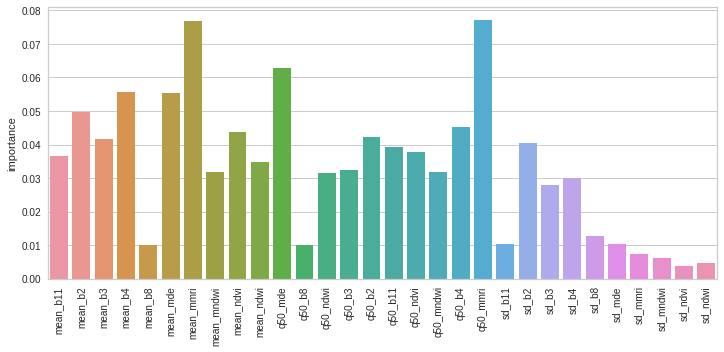

In [ ]:
plt.figure(figsize=(12,5))
g = sns.barplot(x=colnames,y=feature_importances['importance'])
g.tick_params(axis='x', rotation=90)
plt.show()

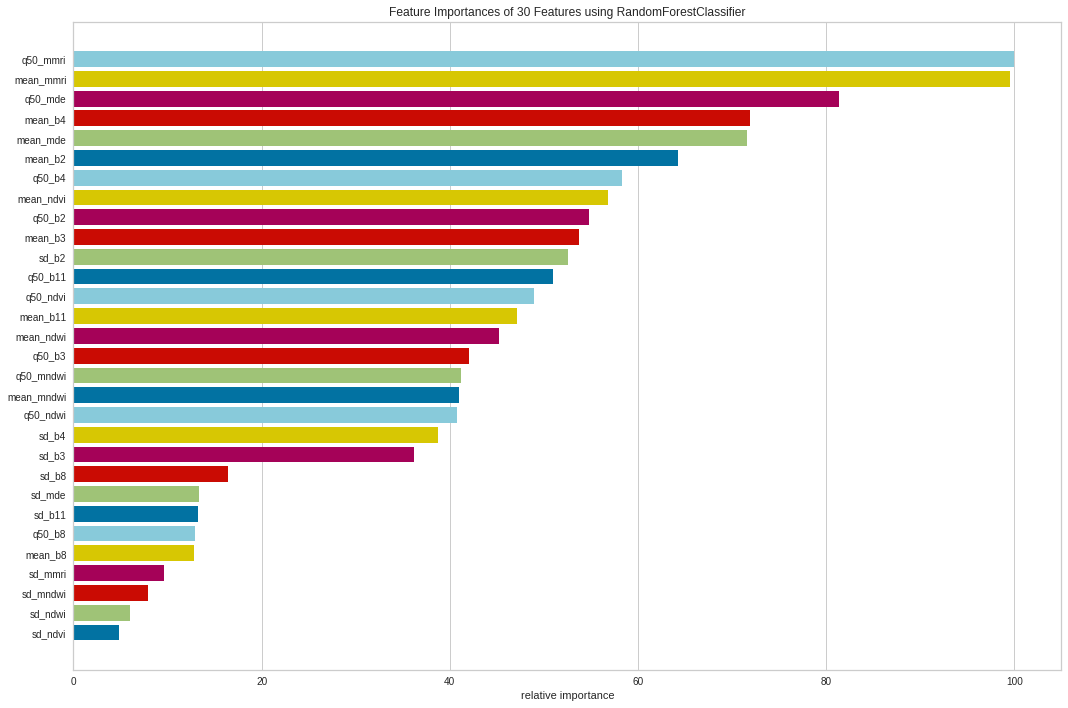

In [ ]:
from yellowbrick.features import FeatureImportances
plt.figure(figsize=(15,10))
model = RandomForestClassifier()
viz = FeatureImportances(rf)
viz.fit(X, y)
viz.show()

In [ ]:
import eli5
eli5.show_weights(rf, feature_names = X_train.columns.tolist())

Weight,Feature
0.0772 ± 0.2422,q50_mmri
0.0769 ± 0.2397,mean_mmri
0.0629 ± 0.1871,q50_mde
0.0555 ± 0.1911,mean_b4
0.0553 ± 0.1798,mean_mde
0.0496 ± 0.1607,mean_b2
0.0451 ± 0.1762,q50_b4
0.0439 ± 0.1631,mean_ndvi
0.0423 ± 0.1541,q50_b2
0.0415 ± 0.1540,mean_b3


In [ ]:
from eli5 import show_prediction
show_prediction(rf, X_train.iloc[1], feature_names = X_train.columns.tolist(),
                show_feature_values=True)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

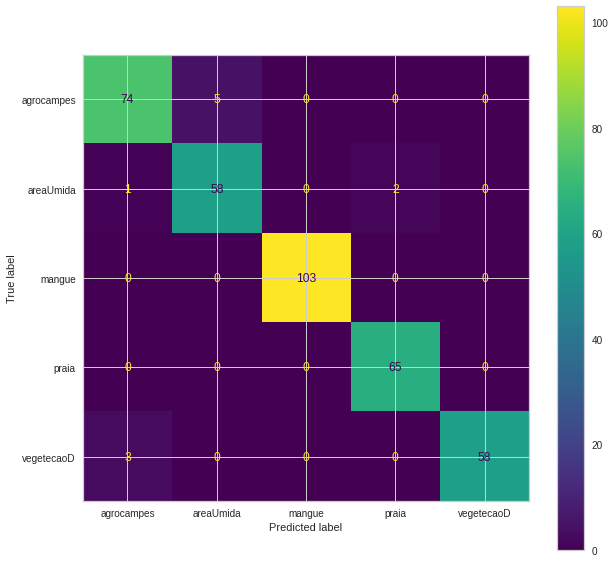

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(rf, X_test, y_test, ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

print(f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))

0.9702254474193799
0.9701897018970189
0.9706426818427789
0.9701897018970189


In [ ]:
y = df['classe']
X = df.drop(columns=['classe'])

In [ ]:
X.shape

(175247, 30)

In [ ]:
X['mean_mde'][X['mean_mde'] < 0] = 0
X['q50_mde'][X['q50_mde'] < 0] = 0
X['sd_mde'][X['sd_mde'] < 0] = 0

In [ ]:
class_df = rf.predict(X)

In [ ]:
X.shape

(175247, 30)

In [ ]:
df_pred = pd.DataFrame(class_df)

In [ ]:
X.shape

(175247, 30)

In [ ]:
from google.colab import files

df_pred.to_csv('df_final.csv',index=False)
files.download('df_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

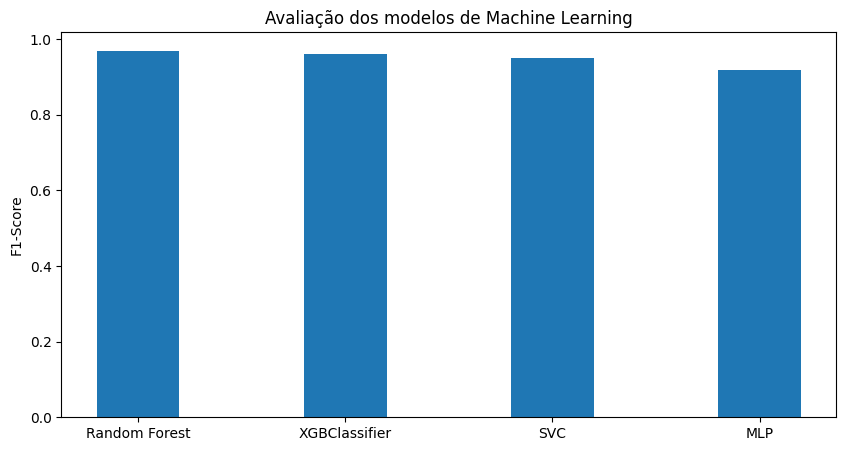

In [ ]:
data = {'Random Forest':0.97, 'XGBClassifier':0.96, 'SVC':0.95,
        'MLP':0.92}

courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values,
        width = 0.4)

#plt.xlabel("Courses offered")
plt.ylabel("F1-Score")
plt.title("Avaliação dos modelos de Machine Learning")
plt.show()